# BollingerBands

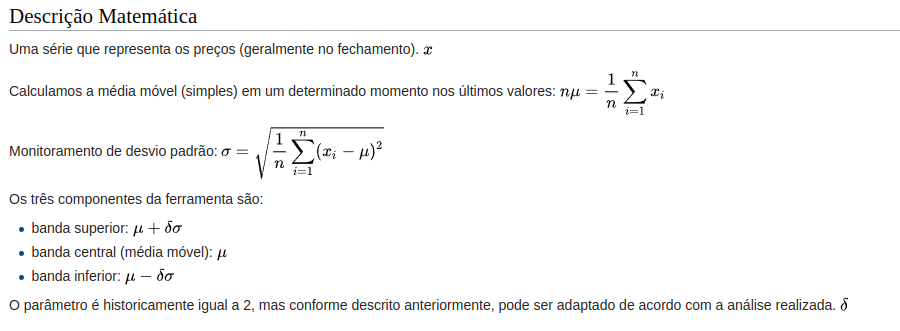

### Ref: https://pt.frwiki.wiki/wiki/Bandes_de_Bollinger

In [1]:
∑ᵢᵏ = sum
MA(V)= ∑ᵢᵏ(V)/length(V)
SMA(V, P) = [ K>=P && 0<P<=length(V) ? MA(V[K-P+1:K]) : missing for K ∈ 1:length(V)]

SMA (generic function with 1 method)

In [2]:
BB(V,P,δ=2) = begin
     ∑ = sum
     n = length(V)
     σ(v) =  √((1/length(v)) * ∑((v .- MA(v)).^2))
     μₙ= SMA(V, P)
     σₙ= [ K>=P && 0<P<=n ? σ(V[K-P+1:K]) : missing for K ∈ 1:n]
     bh = μₙ .+ δ.*σₙ
     bl = μₙ .- δ.*σₙ
     (μₙ,bh,bl)
end

BB (generic function with 2 methods)

In [11]:
BB([1,2,3,4,5],3)

(Union{Missing, Float64}[missing, missing, 2.0, 3.0, 4.0], Union{Missing, Float64}[missing, missing, 3.632993161855452, 4.6329931618554525, 5.6329931618554525], Union{Missing, Float64}[missing, missing, 0.36700683814454793, 1.367006838144548, 2.367006838144548])

In [4]:
using Plots

In [5]:
plotly()

┌ Info: For saving to png with the Plotly backend PlotlyBase has to be installed.
└ @ Plots /home/konira/.julia/packages/Plots/lW9ll/src/backends.jl:318


Plots.PlotlyBackend()

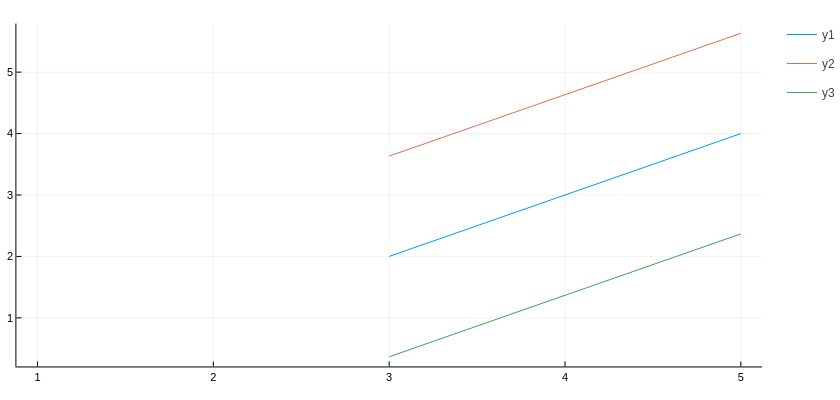

In [6]:
(μₙ,bh,bl) = BB([1,2,3,4,5],3)

plot(μₙ)
plot!(bh)
plot!(bl)

In [7]:
using PyCall
@pyimport vectorbt as vbt
dados = vbt.BinanceData.download("MATICUSDT", start="2021-06-01",interval="1d").get()
first(dados)

/home/konira/.local/lib/python3.10/site-packages/dateparser/date_parser.py:35: PytzUsageWarning: The localize method is no longer necessary, as this time zone supports the fold attribute (PEP 495). For more details on migrating to a PEP 495-compliant implementation, see https://pytz-deprecation-shim.readthedocs.io/en/latest/migration.html
  date_obj = stz.localize(date_obj)
2021-06-01 03:00:00+00:00 - 2022-09-03 00:00:00+00:00: : 1it [00:01,  1.05s/it]


"Open"

In [8]:
using DataFrames,TimeSeries,Dates

In [9]:
matic = DataFrame(timestamp=dados.index .|> c->c ,Close=dados.Close .|> c->c ,Open=dados.Open .|> c->c ,High=dados.High .|> c->c,Low=dados.Low .|> c->c)
first(matic)

,timestamp,Close,Open,High,Low
,DateTime,Float64,Float64,Float64,Float64
1,2021-06-02T00:00:00,1.7996,1.82492,1.89,1.7496


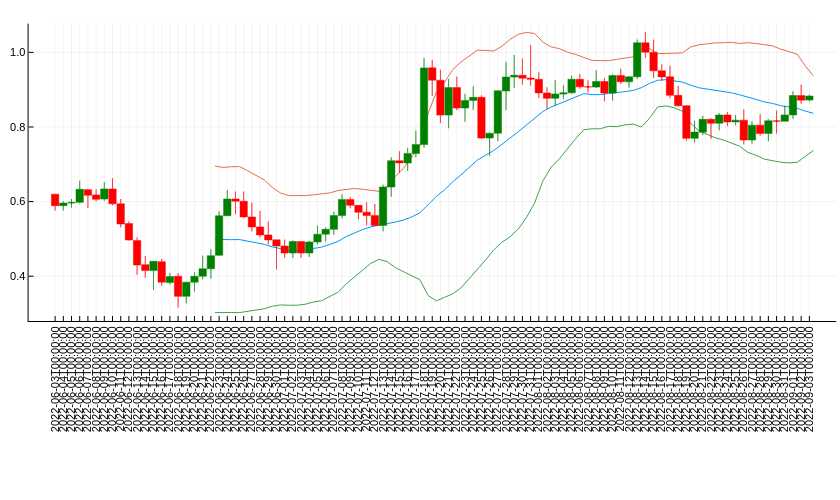

In [10]:
with(:plotly, size=(900,500)) do
  amostragem = filter(row -> row.timestamp > DateTime("2022-06-02T00:00:00"),matic)
  (μₙ,bh,bl) = BB(amostragem.Close,20,2)
  plot(μₙ)
  plot!(bh)
  plot!(bl)
  plot!(TimeArray(amostragem, timestamp = :timestamp), seriestype = :candlestick)
end